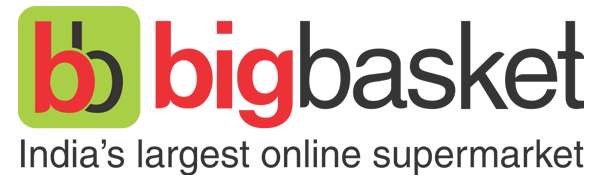

## BigBasket Product Recommendation System
***Project By : PRASAD JADHAV***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('bigbasket_products.csv')
pd.set_option('display.max_columns',10)
print(df.shape)

(27555, 10)


In [4]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


### Dataset Structure Overview Columns:

- index: A unique identifier for each product (int64).
- product: Name of the product (object); 1 missing value.
- category: High-level category of the product (object); no missing values.
- sub_category: More specific category of the product (object); no missing values.
- brand: Brand name (object); 1 missing value.
- sale_price: Sale price of the product (float64); no missing values.
- market_price: Original market price (float64); no missing values.
- type: Type of product within its subcategory (object); no missing values.
- rating: Customer rating (float64); significant missing values (6,626 missing).
- description: Text description of the product (object); 115 missing values.

In [10]:
cat_cols = [x for x in df.columns if df[x].dtypes != 'float64']

for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'index':
index
1        1
18379    1
18377    1
18376    1
18375    1
        ..
9183     1
9182     1
9181     1
9180     1
27555    1
Name: count, Length: 27555, dtype: int64

________________________________________

Value counts for column 'product':
product
Turmeric Powder/Arisina Pudi                                     26
Extra Virgin Olive Oil                                           15
Cow Ghee/Tuppa                                                   14
Soft Drink                                                       12
Colorsilk Hair Colour With Keratin                               12
                                                                 ..
Pepper & Herb Salami Chicken                                      1
Nutmeg Powder                                                     1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude     1
Chocolates-Roasted Peanut Chocolate                               1
Green Tea - Pure Original        

In [11]:
num_cols = [x for x in df.columns if df[x].dtypes == 'float64']

for col in num_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "_"*40 + "\n")

Value counts for column 'sale_price':
sale_price
99.00      406
199.00     317
50.00      317
299.00     302
150.00     291
          ... 
536.00       1
415.10       1
179.08       1
97.80        1
1525.75      1
Name: count, Length: 3256, dtype: int64

________________________________________

Value counts for column 'market_price':
market_price
199.00     584
150.00     469
99.00      465
50.00      446
250.00     429
          ... 
13.75        1
4475.00      1
4099.00      1
153.75       1
1071.00      1
Name: count, Length: 1348, dtype: int64

________________________________________

Value counts for column 'rating':
rating
4.2    2251
4.3    2140
4.0    2090
4.1    1769
5.0    1407
4.4    1038
3.9     932
3.8     866
4.5     798
3.0     684
3.7     672
3.5     536
3.6     447
3.3     400
1.0     387
4.6     322
3.4     303
4.7     287
2.0     237
4.8     199
3.2     181
3.1     163
2.5     132
2.8     125
2.7     116
2.3      94
2.9      79
2.6      58
4.9      53
1.5      32
2

In [12]:
num_features = df.select_dtypes(include = ['int64', 'float64']).dtypes.index

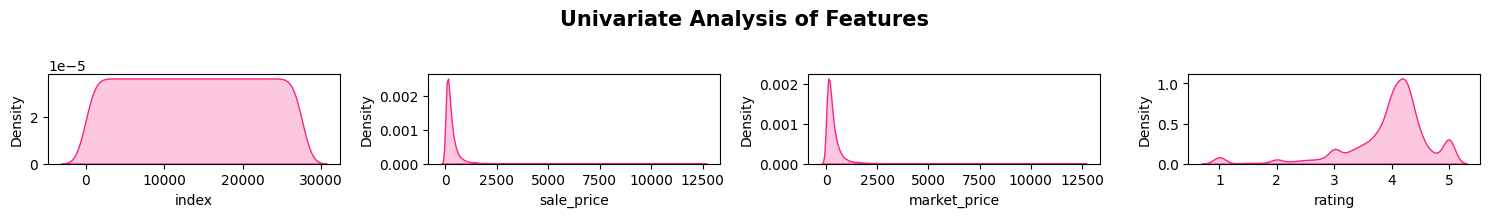

In [13]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True,color='#F72585') #7209B7
    plt.tight_layout()

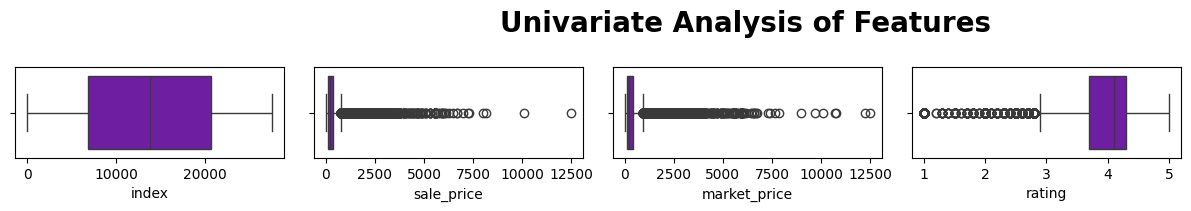

In [14]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data=df,x=num_features[i],color='#7209B7')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [15]:
cat_features = df.select_dtypes(include='object').dtypes.index

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(cat_features)):
    plt.subplot(10,4,i+1)
    sns.countplot(x=df[cat_features[i]],color='#F72585')
    plt.tight_layout()

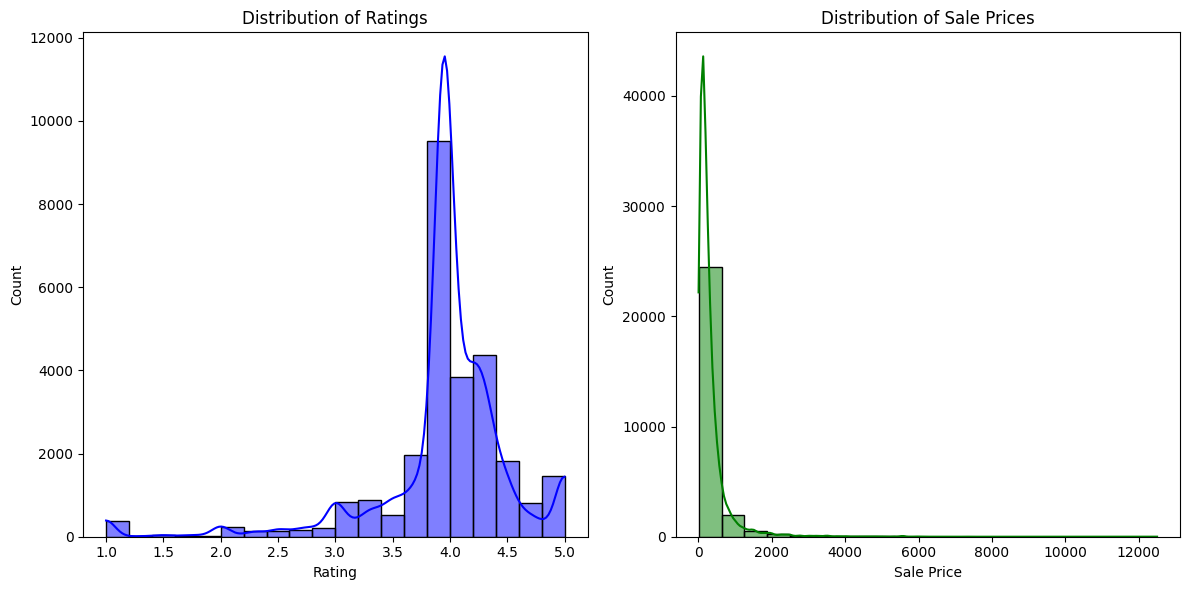

In [12]:
# Handling missing values
# Fill missing 'product' and 'brand' with 'Unknown'
df['product'].fillna('Unknown', inplace=True)
df['brand'].fillna('Unknown', inplace=True)

# Fill missing 'rating' with the mean rating
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Drop rows with missing 'description' as it may not be relevant for all ML tasks
df.dropna(subset=['description'], inplace=True)

# Basic summary statistics
# summary_stats = df.describe(include='all')

# Visualizing the distribution of 'rating' and 'sale_price'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')

plt.subplot(1, 2, 2)
sns.histplot(df['sale_price'], kde=True, bins=20, color='green')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')

plt.tight_layout()
plt.show()

# Top 10 categories by frequency
top_categories = df['category'].value_counts().head(10)

# summary_stats, top_categories

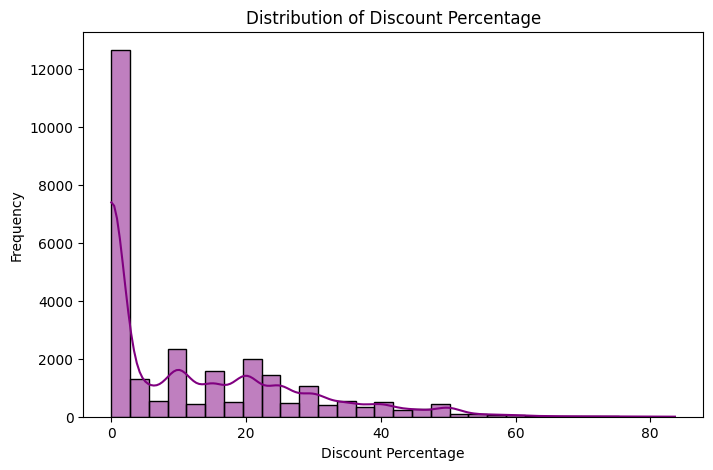

In [13]:
# Feature Engineering: Create a discount percentage column
df['discount_percentage'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100

# Visualizing the distribution of discount percentage
plt.figure(figsize=(8, 5))
sns.histplot(df['discount_percentage'], kde=True, bins=30, color='purple')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Display the updated dataset's top rows
# df.head()

### Regression: Predict product ratings based on numerical and categorical features

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# Preprocessing for Regression
X_reg = df[['sale_price', 'discount_percentage']]
y_reg = df['rating']

In [16]:
# Splitting the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [17]:
# Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [18]:
# Predictions
y_pred_reg = reg_model.predict(X_test_reg)

In [19]:
# Evaluation
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f'Regression RMSE: {reg_rmse}')

Regression RMSE: 0.6114003330059635


### Classification: Predict product categories based on features

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Preprocessing for Classification
X_class = df[['sale_price', 'discount_percentage', 'rating']]
y_class = df['category']

In [22]:
# Encoding target variable
y_class_encoded = pd.factorize(y_class)[0]

In [23]:
# Splitting the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

In [24]:
# Classification Model
class_model = RandomForestClassifier(random_state=42)
class_model.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [25]:
# Predictions
y_pred_class = class_model.predict(X_test_class)

In [26]:
# Evaluation
class_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {class_accuracy}')

Classification Accuracy: 0.4573615160349854


### Clustering: Group products based on their features

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Preprocessing for Clustering
clustering_features = df[['sale_price', 'discount_percentage', 'rating']]

In [29]:
# Clustering Model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_features)

KMeans(n_clusters=5, random_state=42)

In [30]:
# Evaluation
cluster_labels = kmeans.labels_
silhouette = silhouette_score(clustering_features, cluster_labels)
print(f'Clustering Silhouette Score: {silhouette}')

Clustering Silhouette Score: 0.6367088021321992


### NLP Analysis: Analyze product descriptions for key terms

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Preprocessing for NLP
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['description'].fillna(''))

In [34]:
# Top Keywords
top_keywords = tfidf.get_feature_names_out()
print('Top Keywords in Descriptions:')
print(top_keywords)

Top Keywords in Descriptions:
['100' 'easy' 'food' 'free' 'fresh' 'hair' 'healthy' 'helps' 'high' 'make'
 'natural' 'oil' 'perfect' 'quality' 'rich' 'skin' 'taste' 'tea' 'use'
 'used']


### Recommendation System: Suggest similar products based on price, category, and ratings

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Preprocessing for Recommendation System
recommend_features = df[['sale_price', 'rating']]
recommend_features = (recommend_features - recommend_features.min()) / (recommend_features.max() - recommend_features.min())  # Normalize

In [38]:
# Cosine Similarity
similarity_matrix = cosine_similarity(recommend_features)

In [43]:
# Function to Recommend Products
def recommend_products(product_index, top_n=5):
    similar_products = list(enumerate(similarity_matrix[product_index]))
    similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_indices = [i[0] for i in similar_products]
    return df.iloc[recommended_indices]

In [44]:
# Example Usage
print('Recommended Products for Product Index 0:')
print(recommend_products(0))

Recommended Products for Product Index 0:
       index                    product                  category  \
4735    4736    Scrubber - Sponge Wipes      Cleaning & Household   
4738    4739  Dog Cleanser - Erina Coat    Kitchen, Garden & Pets   
5511    5512          Organic Dal - Tur  Foodgrains, Oil & Masala   
10446  10447       Body Perfume - Power          Beauty & Hygiene   
11558  11559              Sunflower Oil  Foodgrains, Oil & Masala   

                 sub_category              brand  ...  market_price  \
4735   Mops, Brushes & Scrubs               Gala  ...         220.0   
4738   Pet Food & Accessories  Himalaya Pet Care  ...         220.0   
5511          Organic Staples         Pro Nature  ...         220.0   
10446       Fragrances & Deos                 HE  ...         220.0   
11558      Edible Oils & Ghee          Patanjali  ...         220.0   

                           type rating  \
4735   Utensil Scrub-Pad, Glove    4.1   
4738    Pet Cleaning & Grooming 

### Outlier Detection: Identify products with unusual pricing or discounts using Isolation Forest

In [39]:
from sklearn.ensemble import IsolationForest

In [45]:
# Preprocessing for Outlier Detection
outlier_features = df[['sale_price', 'discount_percentage']]

In [46]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(outlier_features)

In [48]:
# Mark Outliers in Dataset
df['Outlier'] = outliers
print("Outlier Products:")
print(df[df['Outlier'] == -1])

Outlier Products:
       index                                            product  \
34        35               Pet Solitaire Container Set - Silver   
43        44    Storage/Lunch Steel Container with PP Lid - Red   
105      106  2 Fold Umbrella - Auto-Open & Manual Close, Da...   
117      118            Steel Bowl/Vati/Katori - No. 4, Chutney   
144      145                       Turmeric Powder/Arisina Pudi   
...      ...                                                ...   
27455  27456                  NHT 1049 Cordless Trimmer For Men   
27485  27486  Steel Cook & Serve Set With Glass Lid, 1500 ml...   
27514  27515                     Verge & Sheer Perfume For Pair   
27538  27539  Quista Pro Advanced Whey Protein Formula forti...   
27542  27543                    Embellish Skin Lightening Serum   

                       category           sub_category               brand  \
34       Kitchen, Garden & Pets  Storage & Accessories              Steelo   
43       Kitchen, Gar

### Time Series Analysis: Predict future sales trends using synthetic time-series data

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generating a synthetic time-series dataset
sales_df = df.groupby('category')['sale_price'].sum().reset_index()
sales_df['month'] = pd.date_range(start='2024-01-01', periods=len(sales_df), freq='M')

# Time Series Model
sales_df.set_index('month', inplace=True)
ts_model = ExponentialSmoothing(sales_df['sale_price'], seasonal='add', seasonal_periods=12)
ts_fit = ts_model.fit()

# Forecasting
forecast = ts_fit.forecast(steps=12)
print('Sales Forecast for Next 12 Months:')
print(forecast)

### Multi-label Classification: Predict multiple tags (e.g., organic, gluten-free) for products

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing for Multi-label Classification
multi_label_X = df[['sale_price', 'rating']]
multi_label_y = pd.get_dummies(df[['organic', 'gluten_free']].fillna(0))  # Example binary tags

# Multi-output Model
multi_model = MultiOutputClassifier(LogisticRegression())
multi_model.fit(multi_label_X, multi_label_y)

# Predictions
multi_predictions = multi_model.predict(multi_label_X)
print('Multi-label Predictions for First 5 Products:')
print(multi_predictions[:5])

### Dimensionality Reduction: Visualize high-dimensional data using PCA

In [54]:
from sklearn.decomposition import PCA

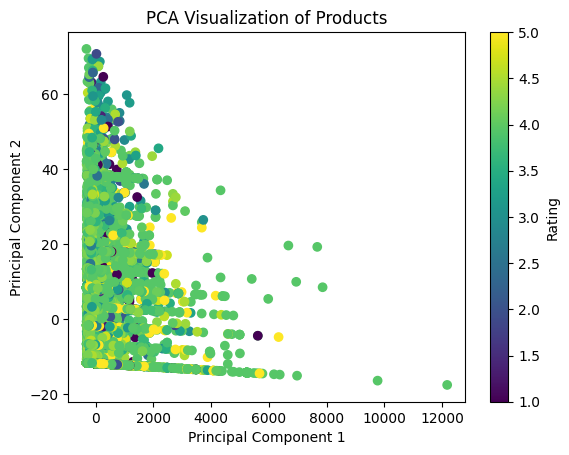

In [56]:
# Preprocessing for PCA
pca_features = df[['sale_price', 'discount_percentage', 'rating']]

# PCA Model
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_features)

# Visualization
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['rating'], cmap='viridis')
plt.colorbar(label='Rating')
plt.title('PCA Visualization of Products')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Sentiment Analysis: Perform sentiment classification on descriptions

In [58]:
from textblob import TextBlob

In [60]:
# Sentiment Analysis Function
def sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply Sentiment Analysis
df['sentiment_score'] = df['description'].fillna('').apply(sentiment_score)

# Example Insights
print('Top Positive Descriptions:')
print(df.nlargest(5, 'sentiment_score')[['description', 'sentiment_score']])

Top Positive Descriptions:
                                            description  sentiment_score
488   Luscious Raspberries and Juicy Strawberries Bl...              1.0
552   Lindberg Brittles are Peanut based jaggery bri...              1.0
753   The Man Company Premium Eau De Toilette is the...              1.0
1114  EAN Code: 1204807  Manufactured by: JMB Enterp...              1.0
1330  Made from rice, Mangalore Rice Papads are crun...              1.0


### Anomaly Detection: Detect anomalies in sales using DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
# Preprocessing for Anomaly Detection
anomaly_features = df[['sale_price', 'discount_percentage']]

# DBSCAN Model
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['Anomaly'] = dbscan.fit_predict(anomaly_features)

# Mark Anomalies
print('Detected Anomalies:')
print(df[df['Anomaly'] == -1])

Detected Anomalies:
       index                                            product  \
2          3                     Brass Angle Deep - Plain, No.2   
4          5                 Creme Soft Soap - For Hands & Body   
8          9  Biotin & Collagen Volumizing Hair Shampoo + Bi...   
15        16           Dove Plastic Soap Case - Assorted Colour   
19        20                          Organic Tofu - Soy Paneer   
...      ...                                                ...   
27542  27543                    Embellish Skin Lightening Serum   
27544  27545          Brass Dhoop Aarti With Wooden Handle,No.3   
27545  27546    Toilet Cleaning Brush - Round With Holder (Big)   
27549  27550                               Papad - Garlic Disco   
27554  27555                     United Dreams Go Far Deodorant   

                     category            sub_category  \
2        Cleaning & Household             Pooja Needs   
4            Beauty & Hygiene        Bath & Hand Wash   
8   

### More Experiment
***BigBasket Product Recommendor***

In [63]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [65]:
df = df.dropna()

#### Demographic Filter Recommendor

In [66]:
def sort_recommendor(col='rating',sort_type = False):
    '''
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    '''
    rated_recommend = df.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [67]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [68]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
21312,Serum,Livon,3.0,2.5
18290,Sugar Coated Chocolate,Cadbury Gems,5.0,4.2
21228,Dish Shine Bar,Exo,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
15926,Dreams Cup Cake - Choco,Elite,5.0,3.9
6014,Good Day Butter Cookies,Britannia,5.0,4.1
27413,Layer Cake - Orange,Winkies,5.0,4.1
11306,Happy Happy Choco-Chip Cookies,Parle,5.0,4.2


In [69]:
# Notice that our top product has rating of 2.5 which is quite bad so let's filter down by setting a threshold rating.

In [70]:
rm= df['rating'].mean()
rm

3.9430626326963902

In [71]:
# So the average rating of products is 3.94 Let's use 3.5 as the threshold.

In [72]:
def sort_recommendor(col='rating',sort_type = False):
    '''
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    '''
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [73]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
2761,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.0,4.2
3445,Marie Light Biscuits - Active,Sunfeast,5.0,4.5
14603,50-50 Timepass Biscuits,Britannia,5.0,3.9
17640,Hand Wash - Moisture Shield,Savlon,5.0,4.4
27490,50-50 Timepass Salted Biscuits,Britannia,5.0,4.2
26584,Polo - The Mint With The Hole,Nestle,5.0,4.4
2978,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
19538,Layer Cake - Chocolate,Winkies,5.0,4.2
19202,Bounce Biscuits - Choco Creme,Sunfeast,5.0,4.2
14538,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2


In [74]:
# Notice that the 2.5 rated product is not recommended now!! This was our first recommendor.

### Content Based Recommendor

In [75]:
'''
Let's try using other features such as Category, Sub Category, Brand, Type and Description for much better Recommendation.
We will be using NLP here to extract useful info from the features especially Description so let's understand TF-IDF before using it.

'''

"\nLet's try using other features such as Category, Sub Category, Brand, Type and Description for much better Recommendation.\nWe will be using NLP here to extract useful info from the features especially Description so let's understand TF-IDF before using it.\n\n"

In [76]:
'''
TF-IDF stands for term frequency-inverse document frequency.

What is TF(Term Frequency):

Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency: Number of times the word appears in a document (raw count).

Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document). Logarithmically scaled frequency (e.g. log(1 + raw count)). Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).

What is IDF (inverse document frequency)?


Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D)..
The denominator is simply the number of documents in which the term, t, appears in.

'''

'\nTF-IDF stands for term frequency-inverse document frequency.\n\nWhat is TF(Term Frequency):\n\nTerm frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency: Number of times the word appears in a document (raw count).\n\nTerm frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document). Logarithmically scaled frequency (e.g. log(1 + raw count)). Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).\n\nWhat is IDF (inverse document frequency)?\n\n\nInverse document frequency looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D)..\nThe denominator is simply the number of documents in which the term, t, appear

<div style="text-align:center;">
<img src="https://ecm.capitalone.com/WCM/tech/tf-idf-1.png">
</div>
    
<br>
<div style="text-align:center;">
    <p style="color:#373435; font-size:20px;font-weight:600;text-align:center">
    <b>TF-IDF at work</b>
    </p>
<img src="https://ecm.capitalone.com/WCM/tech/tf-idf-4.png"/>
</div>

In [77]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(18840, 23342)

In [78]:
# Now to compute the similarity score, let's use Linear_Kernel.
# Linear Kernel which Calculates the Dot Product of the tfidf_matrix and returns an aggreate value depicting the Similarity score.

In [79]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01632718, 0.00999603, ..., 0.01056047, 0.01133156,
        0.        ],
       [0.01632718, 1.        , 0.00719713, ..., 0.        , 0.        ,
        0.        ],
       [0.00999603, 0.00719713, 1.        , ..., 0.00635776, 0.        ,
        0.        ],
       ...,
       [0.01056047, 0.        , 0.00635776, ..., 1.        , 0.        ,
        0.        ],
       [0.01133156, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [80]:
# So we will be recommending items based on similarity score.
# But our problem is that we will be getting back the similarity scores so we will be sorting the scores.
# Now we need a reverse-map to get the title and that is what indices is for.

In [81]:
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

In [82]:
get_recommendations_1('Water Bottle - Orange')

11320    Rectangular Plastic Container - With Lid, Mult...
11642                               Jar - With Lid, Yellow
26451     Round & Flat Storage Container - With lid, Green
6163     Premium Rectangular Plastic Container With Lid...
9546     Premium Round Plastic Container With Lid - Yellow
13959    Premium Rectangular Plastic Container With Lid...
19381    Premium Round & Flat Storage Container With Li...
24255      Premium Round Plastic Container With Lid - Blue
26067    Premium Round Plastic Container With Lid - Mul...
26074      Premium Round Plastic Container With Lid - Pink
Name: product, dtype: object

In [83]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

17385                                Cashew Nuts - Salted
23126                        Nutrione - Baked Cashew Nuts
11962    Signature Roasted & Salted Cashew/Godambi - W240
23600                                             Cashews
11947                               Sunflower Seeds - Raw
8765                                     Chilli Nut Chaat
1986                         Whole Cashew/Godambi - Jumbo
2907                                      Cashew - Salted
21538            Salted Party Mix - Premium International
25887                               Broken Cashew/Godambi
Name: product, dtype: object

In [84]:
# Our search was chocolate yet we got Cashews and Nuts recommended.
# We need to optimize this based on category, sub_category and brand.

In [85]:
df_1 = df.copy()

In [86]:
df_1.shape

(18840, 10)

In [87]:
# Notice that a product can be in multiple catergories and sub_categories and they are separated with a &.
# Let's split them into a list for futher processes.

In [88]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [89]:
get_list('A & B, C')

['A', 'B', 'C']

In [90]:
for col in ['category', 'sub_category', 'type']:
    df_1[col] = df_1[col].apply(get_list)

In [91]:
df_1.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


In [92]:
# To avoid duplicacy, we will be converting everything to lowercase and also removing spaces between words.
# This will ensure that our recommendor doesn't consider Chocolate of Cholocate IceCream and Chocolate Bar as the same.

In [93]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [94]:
for col in ['category', 'sub_category', 'type','brand']:
    df_1[col] = df_1[col].apply(cleaner)

In [95]:
df_1.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


In [96]:
# We will now be joining the values of category, sub_category, type and brand

In [97]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df_1['soup'] = df_1.apply(couple, axis=1)

In [98]:
df_1['soup'].head()

0    beauty hygiene haircare srisriayurveda hairoil...
1    kitchen garden pets storage accessories master...
2       cleaning household poojaneeds trm lamp lampoil
3    cleaning household bins bathroomware nakoda la...
4    beauty hygiene bath handwash nivea bathingbars...
Name: soup, dtype: object

In [99]:
# We need to Count the String Vectors and then compute the Cosine Similarity Score.

In [100]:
df_1.to_csv('df_cleaned_1.csv')

In [101]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_1['soup'])

In [102]:
# We need to Count the String Vectors and then compute the Cosine Similarity Score.

In [103]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [104]:
df_1 = df_1.reset_index()
indices = pd.Series(df_1.index, index=df_1['product'])

In [105]:
def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df_1['product'].iloc[movie_indices]

In [106]:
# Comparing Old and New Recommedations

In [107]:
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [108]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Luvit Chocwich Home Delights 187 g,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Wafer Biscuits - Chocolate Flavor,Dark Milk Chocolate Bar
5,Drinking Chocolate - Original,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Biscuit - Bourbon Creams,Chocolate Bar - Fuse
8,Wafers With Hazelnut Cream,Choclairs Gold Coffee
9,Choco Stick - Chocolate,"5 Star Chocolate Home Pack, 200 g, 20 units"


In [109]:
# Our new recommendation are much better compared to the old ones.

In [ ]:
# Thank You!
# More Advance Working Sonn..!
# Notebook Project By : PRASAD JADHAV (ML-ENG)
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com